In [1]:
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 106.0 MB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 87.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 119.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 48.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 60.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install install scikit-learn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 62.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 121.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 31.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 106.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 75.3 MB/s eta 0:00:00

[notice] A new release of p

# AutoEncoder

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

2024-06-28 09:21:26.665313: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 09:21:26.669562: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 09:21:26.715746: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 09:21:27.924757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 데이터 로딩

In [8]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

In [9]:
# 데이터 정규화
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.


In [10]:
train_x = np.reshape(train_x, (len(train_x), 784))
test_x = np.reshape(test_x, (len(test_x), 784))


## 영상 보기

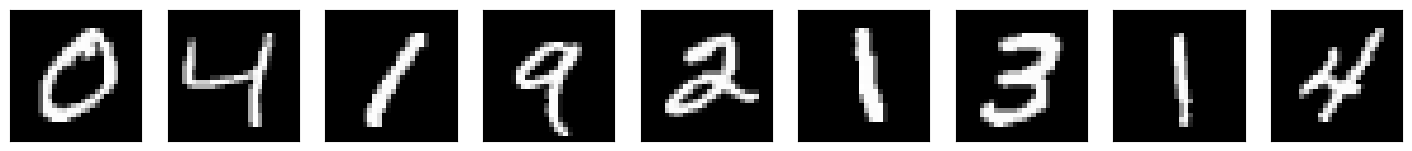

In [11]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(train_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 모델 정의와 학습 실행

In [12]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(train_x, train_x, epochs=100, batch_size=256)


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3339
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1589
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1355
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1255
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1190
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1141
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1110
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1078
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1047
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1022
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1002
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0991
Epoch 13/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0980
Epoch 14/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0968
Epoch 15/100
235/235 ━━━━━━━━━━━━━━━━━━━━

## 결과 확인

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


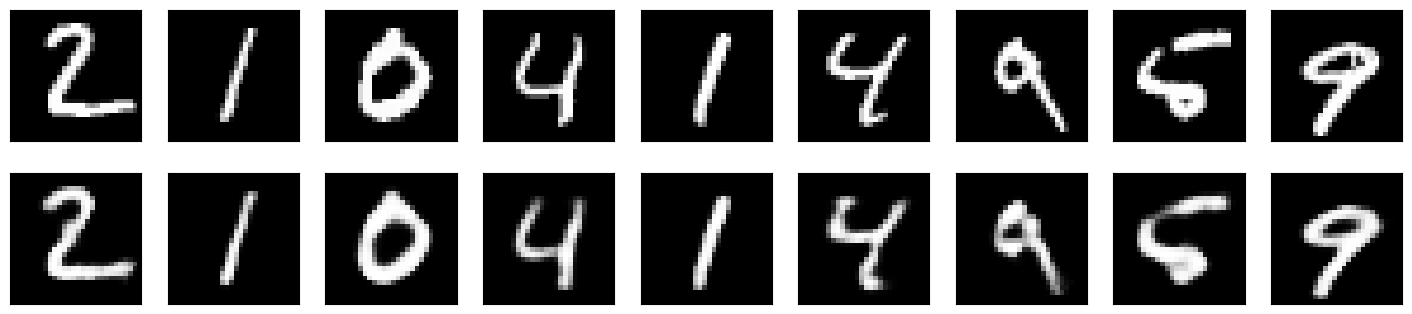

In [13]:
reconstruted = model.predict(test_x)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # 출력된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reconstruted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## AutoEncoder 사용한 노이즈 제거

In [14]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

In [15]:
# 데이터 정규화
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

In [16]:
train_x = np.reshape(train_x, (len(train_x), 784))
test_x = np.reshape(test_x, (len(test_x), 784))

In [17]:
noise = np.random.normal(loc=0.0, scale=1.0, size=10000) 

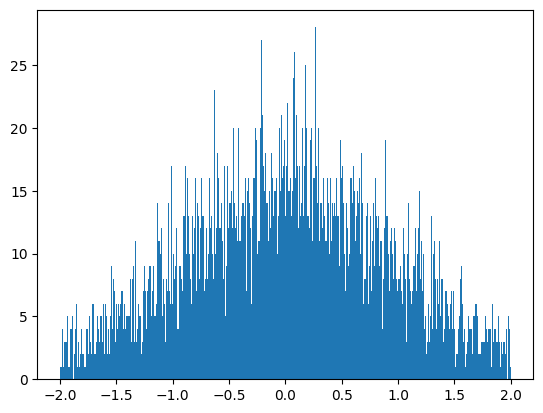

In [18]:
plt.hist(noise, bins=1000, range=(-2., 2.))
plt.show()

In [19]:
# 원본데이터에 Noise 추가
noise_factor = 0.5
train_x_noisy = train_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_x.shape) 
test_x_noisy = test_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_x.shape) 

# 최대가 1, 최소가 0이 되도록 
train_x_noisy = np.clip(train_x_noisy, 0., 1.)
test_x_noisy = np.clip(test_x_noisy, 0., 1.)

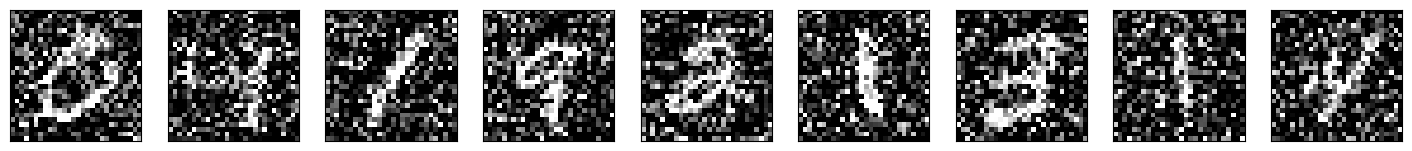

In [20]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(train_x_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(train_x_noisy, train_x, epochs=100, batch_size=256, validation_split=0.1, shuffle=True)

Epoch 1/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.3494 - val_loss: 0.2209
Epoch 2/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2080 - val_loss: 0.1749
Epoch 3/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1707 - val_loss: 0.1601
Epoch 4/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1584 - val_loss: 0.1527
Epoch 5/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1515 - val_loss: 0.1484
Epoch 6/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1464 - val_loss: 0.1435
Epoch 7/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1427 - val_loss: 0.1412
Epoch 8/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1395 - val_loss: 0.1386
Epoch 9/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1370 - val_loss: 0.1361
Epoch 10/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1350 - val_loss: 0.1345
Epoch 11/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1334 - val_loss: 0.1331
Epoch 12/100
211/211 ━━━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


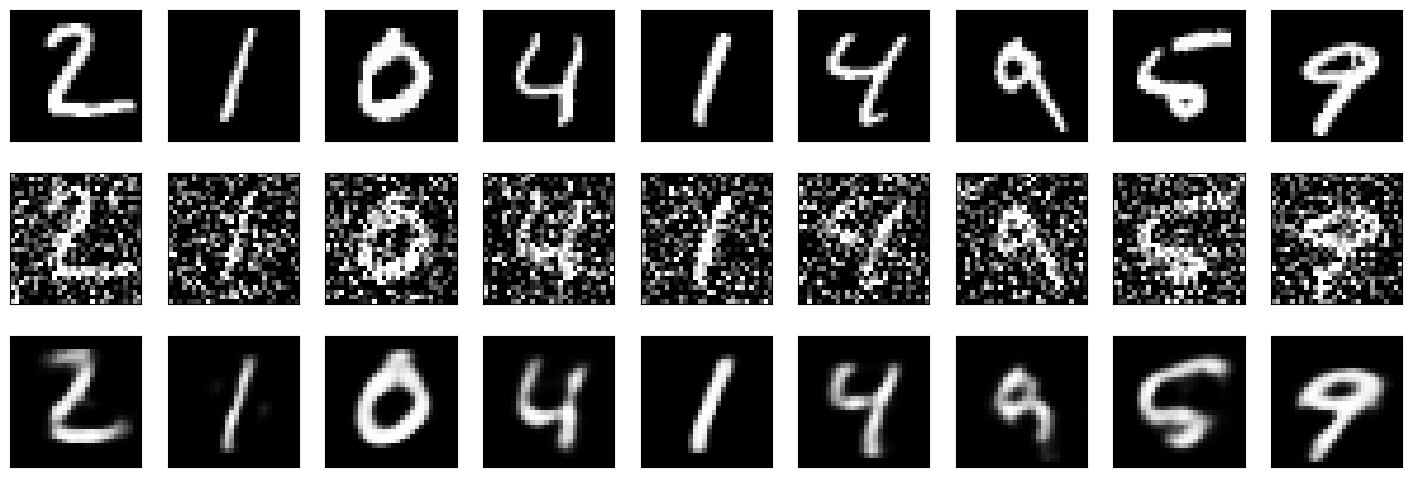

In [22]:
decoded_imgs = model.predict(test_x_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 첨가 된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(test_x_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거 된 것
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# AutoEncoder 사용한 해상도 증대

In [23]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

In [24]:
# 데이터 정규화 및 Reshape
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

In [25]:
def shrink(data, rows, cols):
    return data.reshape(data.shape[0], rows, int(data.shape[1]/rows), cols, int(data.shape[2]/cols)).sum(axis=2).sum(axis=3)

reduced_train_x = shrink(train_x, 14, 14)
reduced_test_x = shrink(test_x, 14, 14)
print(reduced_train_x.shape)
print(reduced_test_x.shape)


(60000, 14, 14)
(10000, 14, 14)


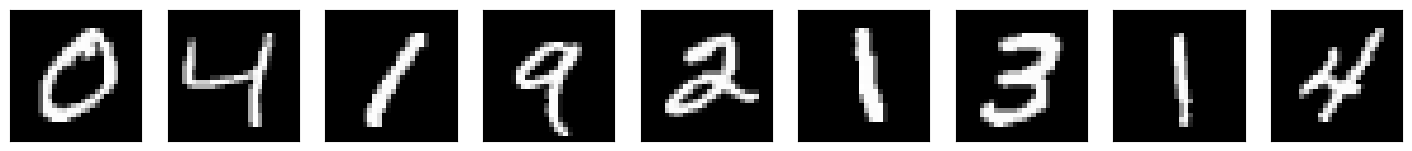

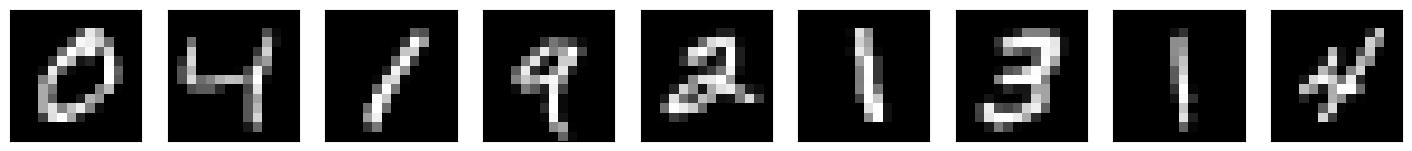

In [26]:
n = 10

plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(train_x[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 해상도 낮아진 이미지 확인
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(reduced_train_x[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
reduced_train_x = reduced_train_x.reshape(reduced_train_x.shape[0], 14*14)
reduced_test_x = reduced_test_x.reshape(reduced_test_x.shape[0], 14*14)
train_x = train_x.reshape(train_x.shape[0], 28*28)
test_x = test_x.reshape(test_x.shape[0], 28*28)

In [28]:
print(reduced_train_x.shape)
print(train_x.shape)
print(reduced_test_x.shape)
print(test_x.shape)

(60000, 196)
(60000, 784)
(10000, 196)
(10000, 784)


In [29]:
# 모델 정의
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=14*14))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(reduced_train_x, train_x, epochs=50, batch_size=256, validation_split=0.1)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0937 - val_loss: 0.0369
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0339 - val_loss: 0.0265
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0251 - val_loss: 0.0215
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0208 - val_loss: 0.0189
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188 - val_loss: 0.0174
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171 - val_loss: 0.0159
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0159 - val_loss: 0.0151
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0150 - val_loss: 0.0143
Epoch 9/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0143 - val_loss: 0.0139
Epoch 10/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0139 - val_loss: 0.0134
Epoch 11/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0133 - val_loss: 0.0130
Epoch 12/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


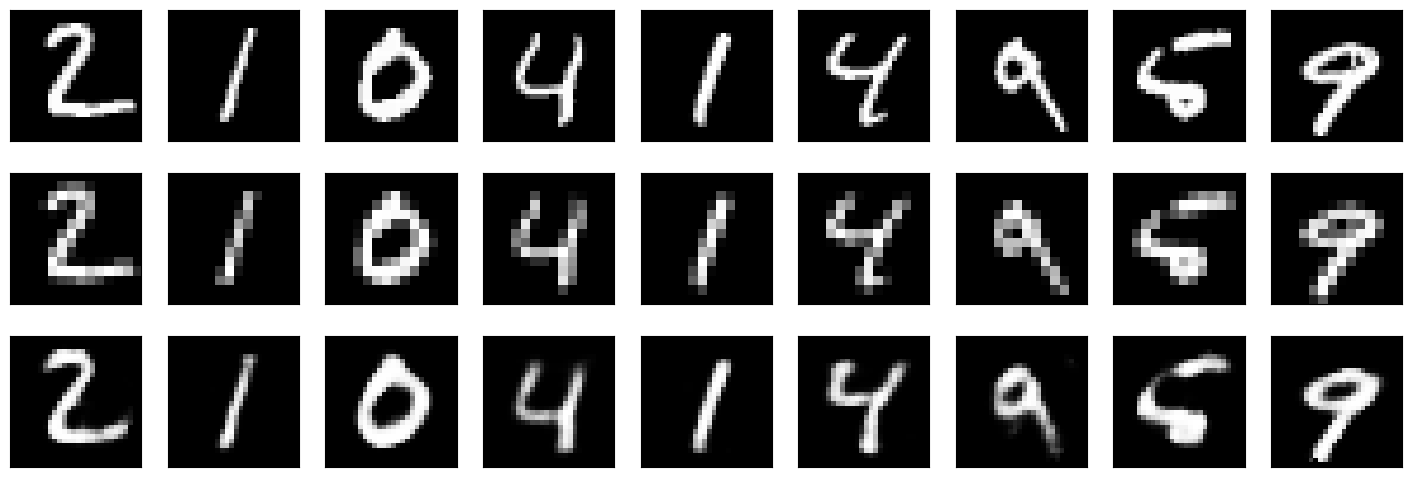

In [30]:
# 결과 확인
super_resolutioned = model.predict(reduced_test_x)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reduced
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reduced_test_x[i].reshape(14,14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display super resolution
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(super_resolutioned[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# U-Net 사용한 영역 분할

In [7]:
!rm -rf Lung_Segmentation.zip
!wget https://github.com/medicieducation/trainingcourse/raw/main/bigdata/deeplearning/material/deep_learning/Lung_Segmentation.zip

--2024-06-28 09:21:45--  https://github.com/medicieducation/trainingcourse/raw/main/bigdata/deeplearning/material/deep_learning/Lung_Segmentation.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/medicieducation/trainingcourse/main/bigdata/deeplearning/material/deep_learning/Lung_Segmentation.zip [following]
--2024-06-28 09:21:45--  https://raw.githubusercontent.com/medicieducation/trainingcourse/main/bigdata/deeplearning/material/deep_learning/Lung_Segmentation.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37648324 (36M) [application/zip]
Saving to: ‘Lung_Segmentation.zip’

Lung_Segment

In [8]:
!rm -rf Lung_Segmentation
!unzip Lung_Segmentation.zip

Archive:  Lung_Segmentation.zip
   creating: Lung_Segmentation/
   creating: Lung_Segmentation/image/
  inflating: Lung_Segmentation/image/CHNCXR_0001_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0002_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0003_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0004_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0005_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0006_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0007_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0008_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0009_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0010_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0011_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0012_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0013_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0014_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0015_0.png  
  inflating: Lung_Segmentation/image/CHNCXR

## 풀린 데이터 파일 구조

```
Lung_segmentaiton/
  image/
    CHNCXR_0001_0.png
    CHNCXR_0002_0.png
    ...
  label/
    CHNCXR_0001_0.png
    CHNCXR_0002_0.png
    ...
```

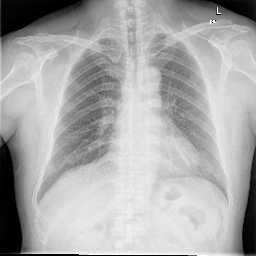

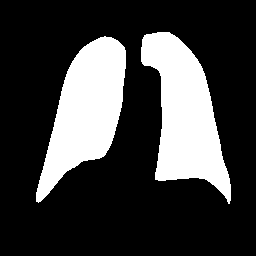

In [9]:
from IPython.display import Image, display

display(Image('./Lung_Segmentation/image/CHNCXR_0001_0.png'))
display(Image('./Lung_Segmentation/label/CHNCXR_0001_0.png'))


In [16]:
import numpy as np
import os

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

data_path = "Lung_Segmentation"

files = os.listdir(os.path.join(data_path, 'image'))
# files = ['CHNCXR_0402_1.png', 'CHNCXR_0461_1.png', 'CHNCXR_0422_1.png', ... ]    


raw_x = []
raw_y = []
for file_name in files:
    # file_name = "CHNCXR_0402_1"

    # input_file = "./Lung_Segmentation/image/CHNCXR_0402_1.png"
    input_file = os.path.join(data_path, 'image', file_name)
    # output_file = "./Lung_Segmentation/label/CHNCXR_0402_1.png"
    output_file = os.path.join(data_path, 'label', file_name)
    
    image = imread(input_file)[:,:,:IMG_CHANNELS]
    # image.shape = (256, 256, 3)

    label = imread(output_file)
    # label.shape = (256, 256)

    label = np.expand_dims(label, axis=-1)
    # label.shape = (256, 256, 1)

    raw_x.append(image)
    raw_y.append(label)

raw_x = np.array(raw_x)
raw_y = np.array(raw_y)

In [17]:
print(raw_x[0])
print(raw_y[0])

[[[58 58 58]
  [22 22 22]
  [ 6  6  6]
  ...
  [22 22 22]
  [31 31 31]
  [37 37 37]]

 [[58 58 58]
  [19 19 19]
  [ 5  5  5]
  ...
  [24 24 24]
  [27 27 27]
  [30 30 30]]

 [[57 57 57]
  [16 16 16]
  [ 4  4  4]
  ...
  [20 20 20]
  [23 23 23]
  [26 26 26]]

 ...

 [[34 34 34]
  [31 31 31]
  [24 24 24]
  ...
  [27 27 27]
  [28 28 28]
  [31 31 31]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [48 48 48]
  [52 52 52]
  [52 52 52]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [75 75 75]
  [73 73 73]
  [81 81 81]]]
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [18]:
x = (raw_x / 255).astype(float)
y = (raw_y / 255).astype(int)

In [19]:
print(np.min(x), np.max(x))
print(np.min(y), np.max(y))

0.0 1.0
0 1


In [20]:
split_index = int(x.shape[0]*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

train


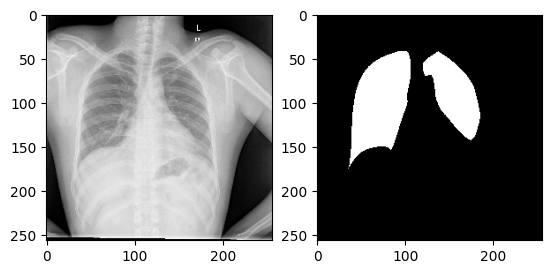

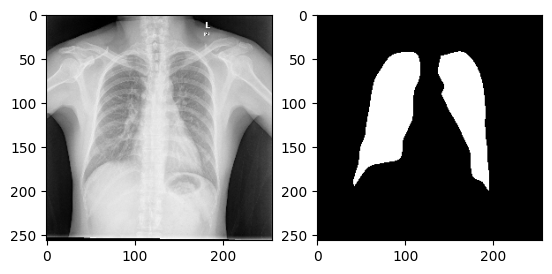

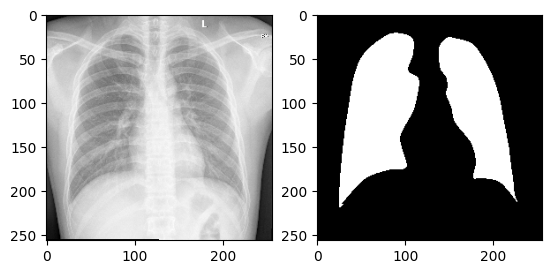

test


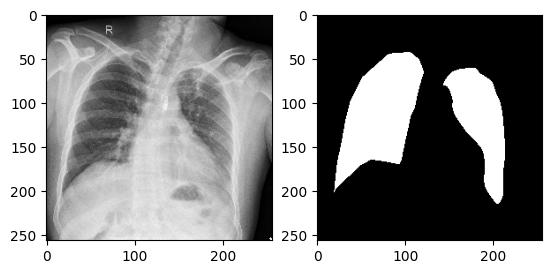

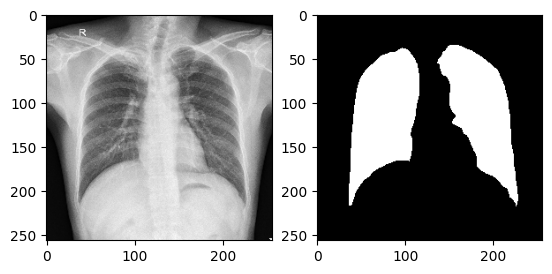

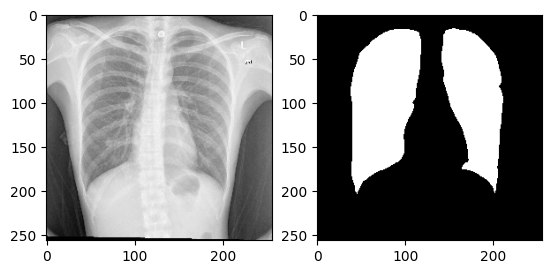

In [21]:
import matplotlib.pyplot as plt

def plotTrainData(x, y, set_type):
    print(set_type)  
    for i in range(3):
        ix = np.random.randint(0, len(x))
        plt.subplot(1,2,1)
        plt.imshow(x[ix])
        
        plt.subplot(1,2,2)
        plt.imshow(np.squeeze(y[ix]), 'gray') # np.squeeze()는 (256,26,1)을 (256,256)으로 변환
        plt.show()
        
plotTrainData(train_x, train_y, 'train')
plotTrainData(test_x, test_y, 'test')


In [22]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

def unet(input_size=(256,256,3)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    
    up = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up, conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    
    up = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up, conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    
    up = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up, conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    
    up = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up, conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

In [23]:
# 모델 생성
model = unet()

# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=['accuracy'])

# 학습
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
 7/12 ━━━━━━━━━━━━━━━━━━━━ 1:05 13s/step - accuracy: 0.6521 - loss: 0.7479